In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/severstal-steel-defect-detection/sample_submission.csv
/kaggle/input/severstal-steel-defect-detection/train.csv
/kaggle/input/severstal-steel-defect-detection/train_images/f1bd3a48a.jpg
/kaggle/input/severstal-steel-defect-detection/train_images/55042415c.jpg
/kaggle/input/severstal-steel-defect-detection/train_images/1dba99dc5.jpg
/kaggle/input/severstal-steel-defect-detection/train_images/636700b91.jpg
/kaggle/input/severstal-steel-defect-detection/train_images/e865201fb.jpg
/kaggle/input/severstal-steel-defect-detection/train_images/cbb659739.jpg
/kaggle/input/severstal-steel-defect-detection/train_images/1849f8952.jpg
/kaggle/input/severstal-steel-defect-detection/train_images/e7a980a8f.jpg
/kaggle/input/severstal-steel-defect-detection/train_images/50fb57a6c.jpg
/kaggle/input/severstal-steel-defect-detection/train_images/2f8a16cc3.jpg
/kaggle/input/severstal-steel-defect-detection/train_images/94a3786cb.jpg
/kaggle/input/severstal-steel-defect-detection/train_images/

In [2]:
df_train = pd.read_csv("/kaggle/input/severstal-steel-defect-detection/train.csv")

In [3]:
df_train

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [4]:
from PIL import Image 

In [5]:
image1 = Image.open("/kaggle/input/severstal-steel-defect-detection/train_images/00031f466.jpg")
image2 = Image.open("/kaggle/input/severstal-steel-defect-detection/train_images/008621629.jpg")
image3 = Image.open("/kaggle/input/severstal-steel-defect-detection/train_images/005f19695.jpg")

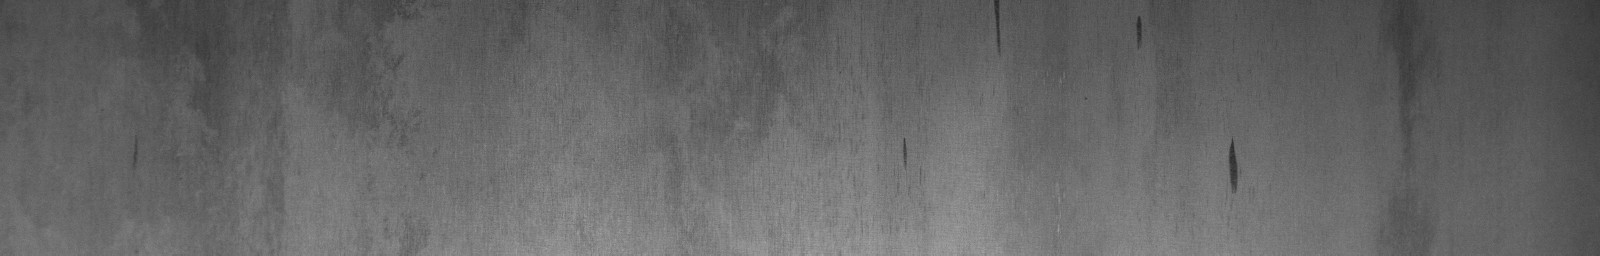

In [6]:
image1

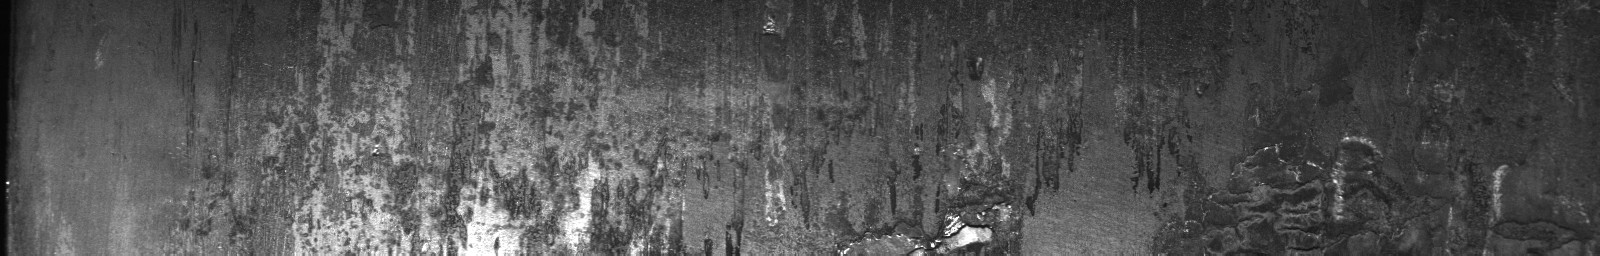

In [7]:
image2

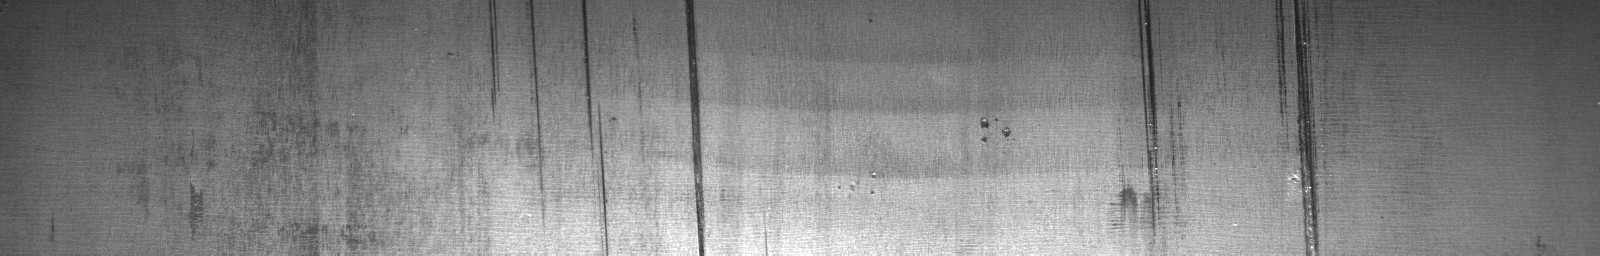

In [8]:
image3

In [9]:
image1.size, image2.size, image3.size          # Same size

((1600, 256), (1600, 256), (1600, 256))

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
data = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.2)

In [12]:
df_train['ClassId'] = df_train['ClassId'].astype(str)

In [13]:
trainData = data.flow_from_dataframe(dataframe=df_train,
                                                directory='/kaggle/input/severstal-steel-defect-detection/train_images',
                                                target_size=(128, 128), x_col='ImageId',
                                                y_col='ClassId', batch_size=16,
                                                class_mode='categorical', subset = "training")

Found 5676 validated image filenames belonging to 4 classes.


In [14]:
testData = data.flow_from_dataframe(dataframe=df_train,
                                                directory='/kaggle/input/severstal-steel-defect-detection/train_images',
                                                target_size=(128, 128), x_col='ImageId',
                                                y_col='ClassId', batch_size=16,
                                                class_mode='categorical', subset = "validation")

Found 1419 validated image filenames belonging to 4 classes.


In [15]:
import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout

In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu", input_shape=(128,128,3)))
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(32, activation ="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation ="relu"))
model.add(Dense(128, activation ="relu"))
model.add(Dense(64, activation ="relu"))
model.add(Dense(32, activation ="relu"))
model.add(Dense(4, activation ="sigmoid"))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 124, 124, 32)      9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 124, 124, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_42 (Dense)             (None, 32)               

In [25]:
!pip install visualkeras
import visualkeras

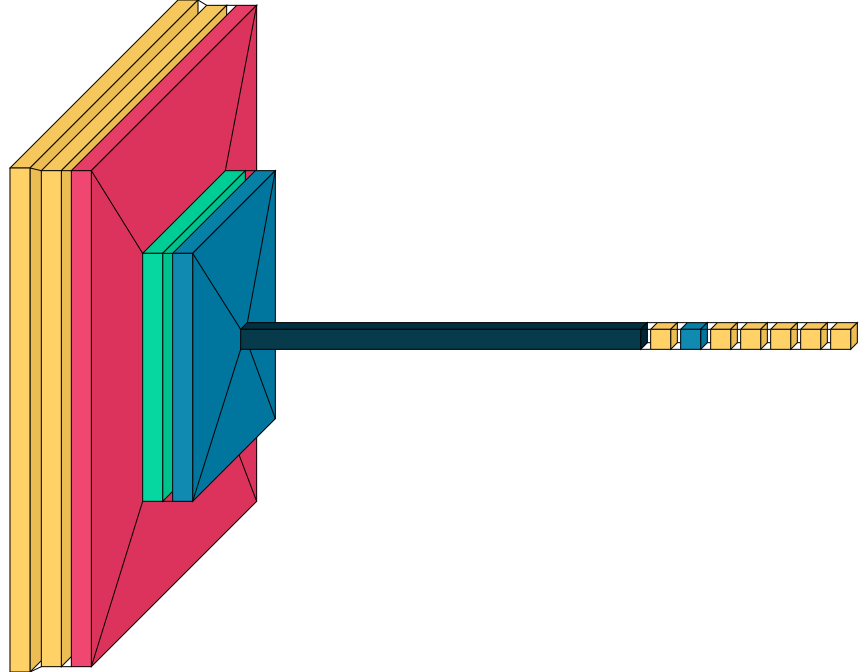

In [43]:
visualkeras.layered_view(model)

In [44]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [49]:
history = model.fit(trainData, steps_per_epoch= len(trainData), epochs = 10, verbose= "auto", validation_data = testData, validation_steps = len(testData), batch_size = 10,shuffle=True)

Epoch 1/10
355/355 [==============================] - 57s 159ms/step - loss: 0.1594 - accuracy: 0.9158 - val_loss: 1.3246 - val_accuracy: 0.7844
Epoch 2/10
355/355 [==============================] - 56s 158ms/step - loss: 0.1524 - accuracy: 0.9204 - val_loss: 1.0414 - val_accuracy: 0.7822
Epoch 3/10
355/355 [==============================] - 55s 156ms/step - loss: 0.1556 - accuracy: 0.9181 - val_loss: 1.1414 - val_accuracy: 0.7794
Epoch 4/10
355/355 [==============================] - 56s 159ms/step - loss: 0.1489 - accuracy: 0.9228 - val_loss: 1.2514 - val_accuracy: 0.7773
Epoch 5/10
355/355 [==============================] - 56s 157ms/step - loss: 0.1643 - accuracy: 0.9156 - val_loss: 0.8821 - val_accuracy: 0.7808
Epoch 6/10
355/355 [==============================] - 56s 158ms/step - loss: 0.1438 - accuracy: 0.9212 - val_loss: 1.3554 - val_accuracy: 0.7865
Epoch 7/10
355/355 [==============================] - 56s 159ms/step - loss: 0.1525 - accuracy: 0.9216 - val_loss: 1.3810 - val_ac